In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np

In [21]:
data = pd.read_csv('Tweets_data_1st.csv',sep=',')
data.head(1000)


,Unnamed: 0,tweet_id,airline_sentiment,sentiment_int,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,0,5.700000e+17,neutral,0,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,1,5.700000e+17,positive,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,2,5.700000e+17,neutral,0,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,3,5.700000e+17,negative,-1,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,4,5.700000e+17,negative,-1,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,5.700000e+17,negative,-1,1.0000,Late Flight,0.7065,United,NaN,tbird12lv,NaN,0,@united by the time I finally get to Dallas I ...,NaN,23-02-2015 13:23,Colorado,Mountain Time (US & Canada)
996,996,5.700000e+17,negative,-1,1.0000,Late Flight,1.0000,United,NaN,cristobalwong,NaN,0,@united I'm trying to get to my final destinat...,NaN,23-02-2015 13:22,San Francisco Bay Area,NaN
997,997,5.700000e+17,negative,-1,1.0000,Customer Service Issue,0.6667,United,NaN,itsmetsforme,NaN,0,@united that guy really has no customer servic...,NaN,23-02-2015 13:21,mets hell,NaN
998,998,5.700000e+17,positive,1,0.6915,NaN,NaN,United,NaN,swampynomo,NaN,0,@united he has no priority and Iove it,NaN,23-02-2015 13:20,NJ/NYC,Eastern Time (US & Canada)


In [22]:
#sentiment_map={'positive':1,'negative':-1,'neutral':0}
#data.insert(2,'sentiment_int',[sentiment_map[s] for s in data.airline_sentiment],True)
#data['sentiment_int']=[sentiment_map[s] for s in data.sentiment]
#data.head(14000)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    14640 non-null  int64  
 1   tweet_id                      14640 non-null  float64
 2   airline_sentiment             14640 non-null  object 
 3   sentiment_int                 14640 non-null  int64  
 4   airline_sentiment_confidence  14640 non-null  float64
 5   negativereason                9178 non-null   object 
 6   negativereason_confidence     10522 non-null  float64
 7   airline                       14640 non-null  object 
 8   airline_sentiment_gold        40 non-null     object 
 9   name                          14640 non-null  object 
 10  negativereason_gold           32 non-null     object 
 11  retweet_count                 14640 non-null  int64  
 12  text                          14640 non-null  object 
 13  t

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

def preProcessor(text):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', ' ', text)
    text=re.sub(r'['+punctuation+']',' ',text)
    text=re.sub(r'#(\w+)',' ',text)
    text=re.sub(r'@(\w+)',' ',text)
    #print(token.tokenize(text))
    return text

token=RegexpTokenizer(r'\w+')
cv=CountVectorizer(lowercase=True,preprocessor=preProcessor,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
text_counts=cv.fit_transform(data['text'])

In [26]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment'],test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment_int'],test_size=0.3)

In [30]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2601  114   61]
 [ 511  350   64]
 [ 264   63  364]]
Normalized confusion matrix
[[0.94 0.04 0.02]
 [0.55 0.38 0.07]
 [0.38 0.09 0.53]]


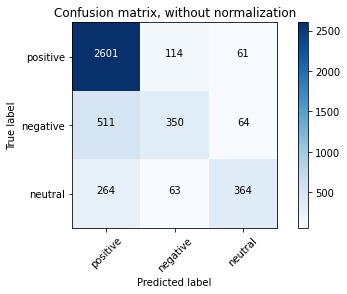

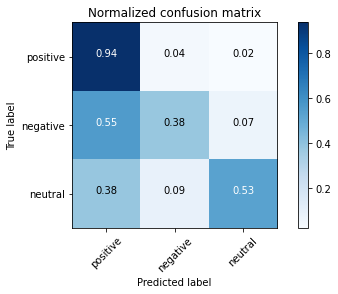

NameError: name 'y_pred' is not defined

In [32]:
#NAIVE BAYES
import sklearn
from sklearn.naive_bayes import *
from sklearn import metrics
from sklearn.metrics import confusion_matrix


clf=MultinomialNB()
#clf_gaus=GaussianNB()
#clf_ber=BernoulliNB()

clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [ ]:
#Ber_NB
clf=BernoulliNB()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

In [ ]:
# K = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred=knn.predict(x_test)
metrics.accuracy_score(y_test, pred)

In [ ]:
# K=7
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
pred=knn.predict(x_test)
metrics.accuracy_score(y_test, pred)

In [ ]:
# K=4
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
pred=knn.predict(x_test)
metrics.accuracy_score(y_test, pred)